# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.** Na verdade: 0 - Não comprou online. 1 - Comprou no site.

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [34]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

In [35]:
# Baixando a base e visualizando o cabeçalho

base = pd.read_csv('marketing_campaign.csv', delimiter=';')
base.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


In [36]:
# Verificando se todos as colunas estão com valores preenchidos, se possuem valores nulos e o formato dos dados inseridos
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [37]:
# Preenchendo os valores faltantes na coluna de income
base['Income'].fillna(base['Income'].median(), inplace=True)

/tmp/ipython-input-917978852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Income'].fillna(base['Income'].median(), inplace=True)


In [38]:
# Verificar através do .describe quais colunas precisamos tratar pela questão dos outliers

base.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25037.955891,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68289.750000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


In [39]:
# Removendo as pessoas com mais de 90 anos

base = base[base['Year_Birth'] >= 1935]

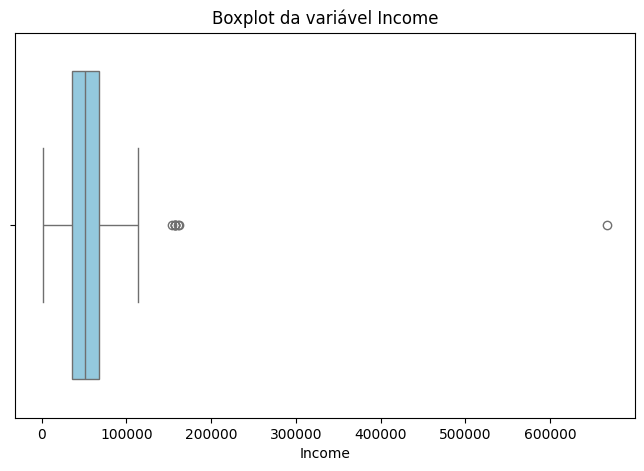

In [40]:
# Boxplot para idenficar necessidade de alteração
plt.figure(figsize=(8, 5))
sns.boxplot(x=base['Income'], color='skyblue')
plt.title('Boxplot da variável Income')
plt.xlabel('Income')
plt.show()

In [41]:
# Removendo o maior outlier, visto que este é discrepante do resto
base = base[base['Income'] != 666666]

/tmp/ipython-input-476389934.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_counts = base.groupby(['Faixa_Etaria', 'WebPurchases']).size().unstack(fill_value=0)


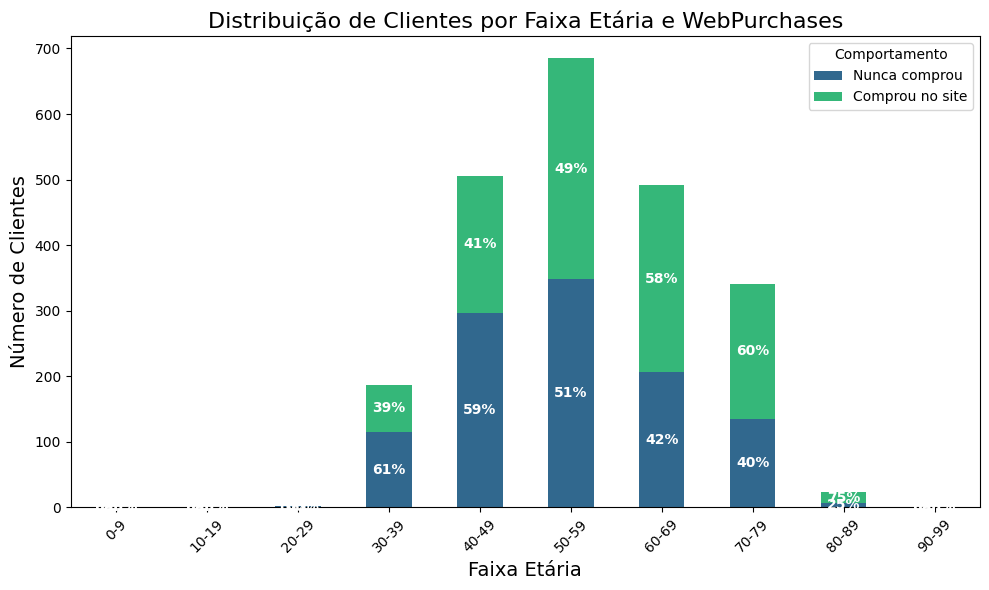

In [42]:
# Calcular faixas etárias
ano_atual = datetime.now().year
bins = list(range(0, 101, 10))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
base['Faixa_Etaria'] = pd.cut(ano_atual - base['Year_Birth'], bins=bins, labels=labels, right=False)

# Contagem por faixa etária e WebPurchases
faixa_counts = base.groupby(['Faixa_Etaria', 'WebPurchases']).size().unstack(fill_value=0)

# Calcular porcentagens dentro de cada faixa
faixa_percent = faixa_counts.div(faixa_counts.sum(axis=1), axis=0) * 100

# Plot empilhado com rótulos de porcentagem
fig, ax = plt.subplots(figsize=(10,6))
cores = sns.color_palette('viridis', 2)
bars = faixa_counts.plot(kind='bar', stacked=True, color=cores, ax=ax)

# Adicionar rótulos de porcentagem
for i, faixa in enumerate(faixa_counts.index):
    total = faixa_counts.loc[faixa].sum()
    bottom = 0
    for j, valor in enumerate(faixa_counts.loc[faixa]):
        perc = faixa_percent.loc[faixa][j]
        ax.text(i, bottom + valor/2, f"{perc:.0f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        bottom += valor

# Estilo
plt.title('Distribuição de Clientes por Faixa Etária e WebPurchases', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Comportamento', labels=['Nunca comprou', 'Comprou no site'])
plt.tight_layout()
plt.show()

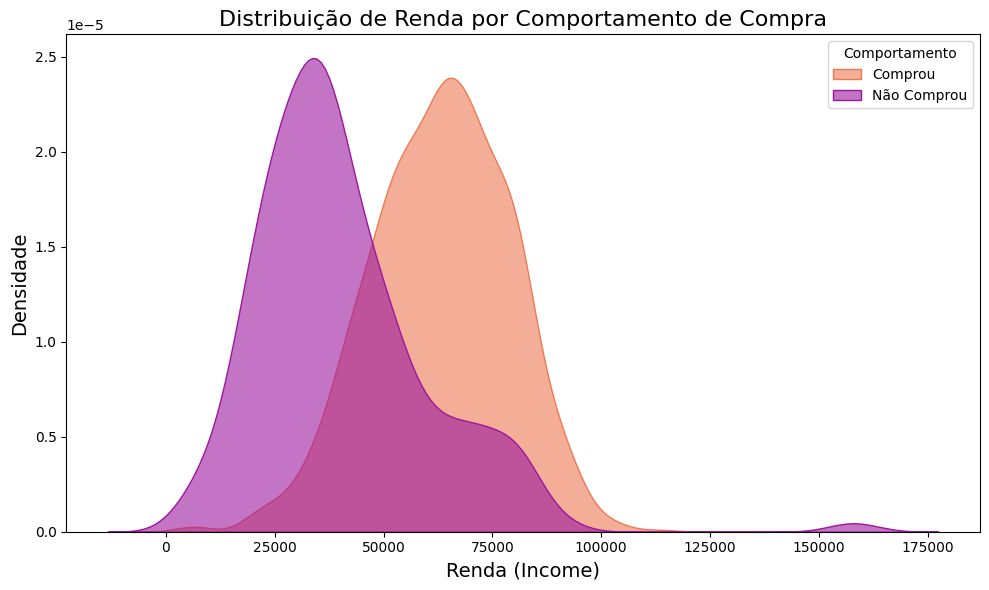

In [43]:
# Gráfico de densidade da renda por comportamento de compra
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=base,
    x="Income",
    hue="WebPurchases",
    fill=True,
    palette="plasma",
    common_norm=False,
    alpha=0.6
)

# Títulos e rótulos
plt.title("Distribuição de Renda por Comportamento de Compra", fontsize=16)
plt.xlabel("Renda (Income)", fontsize=14)
plt.ylabel("Densidade", fontsize=14)
plt.legend(title="Comportamento", labels=["Comprou", "Não Comprou"])
plt.tight_layout()
plt.show()

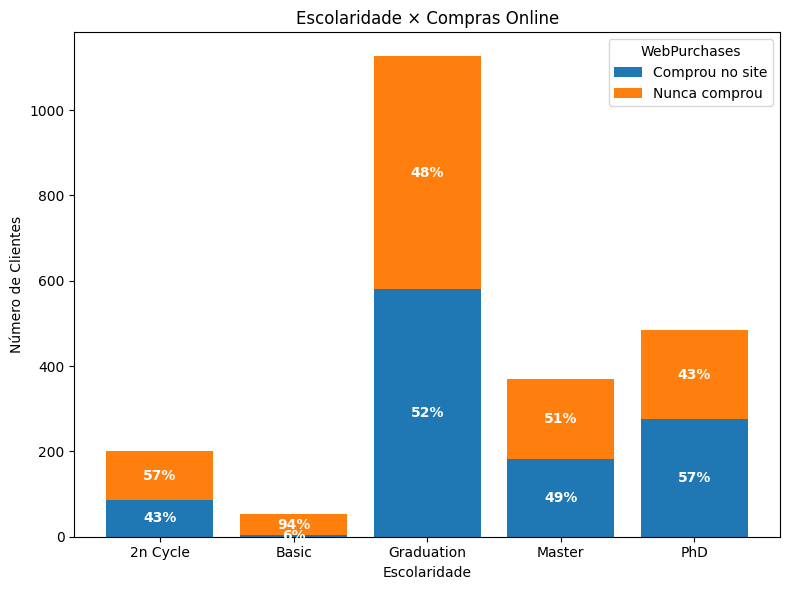

In [44]:
# Criar coluna legível
base['Comprou_Web'] = base['WebPurchases'].map({0: 'Nunca comprou', 1: 'Comprou no site'})

# Contagem e porcentagem
contagem = base.groupby(['Education', 'Comprou_Web']).size().reset_index(name='count')
contagem['perc'] = contagem['count'] / contagem.groupby('Education')['count'].transform('sum') * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bottom = pd.Series([0] * contagem['Education'].nunique())

for status, dados in contagem.groupby('Comprou_Web'):
    ax.bar(dados['Education'], dados['count'], label=status, bottom=bottom)
    for i, (c, p, b) in enumerate(zip(dados['count'], dados['perc'], bottom)):
        ax.text(i, b + c/2, f'{p:.0f}%', ha='center', va='center', color='white', fontweight='bold')
    bottom += dados['count'].values

ax.set_ylabel('Número de Clientes')
ax.set_xlabel('Escolaridade')
ax.set_title('Escolaridade × Compras Online')
ax.legend(title='WebPurchases')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3108975798.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  compras_por_visita = base.groupby('Faixa_Visitas_Web')['WebPurchases'].value_counts(normalize=True).unstack() * 100


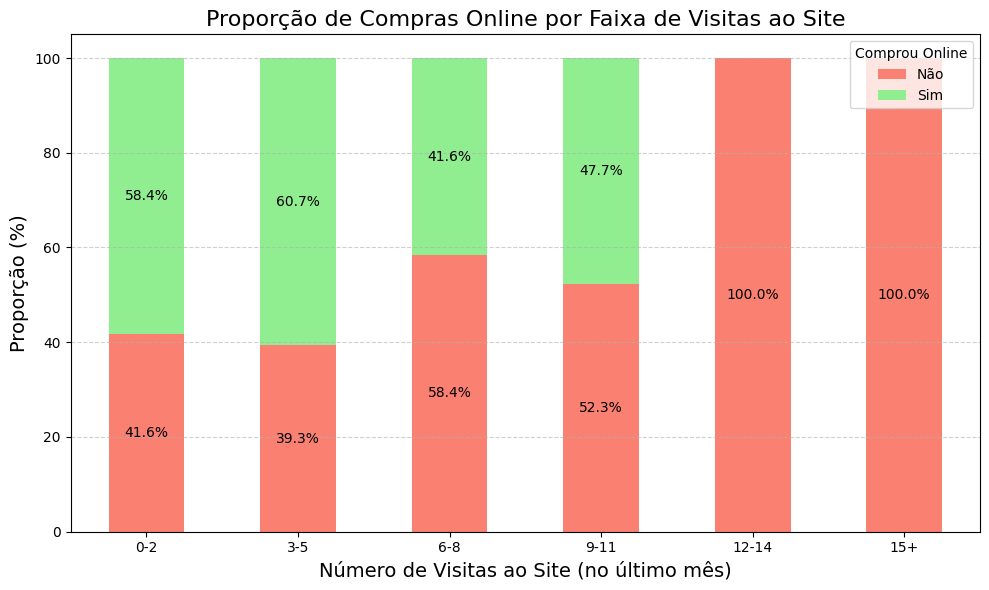

In [45]:
# Agrupando o número de visitas em faixas para facilitar a visualização
# Definindo as faixas de visitas (você pode ajustar esses valores)
bins_visitas = [0, 3, 6, 9, 12, 15, 20]
labels_visitas = ['0-2', '3-5', '6-8', '9-11', '12-14', '15+']

base['Faixa_Visitas_Web'] = pd.cut(base['NumWebVisitsMonth'], bins=bins_visitas, labels=labels_visitas, right=False, include_lowest=True)

# Calculando a proporção de compradores online por faixa de visitas
compras_por_visita = base.groupby('Faixa_Visitas_Web')['WebPurchases'].value_counts(normalize=True).unstack() * 100

# Plotando o gráfico de barras empilhadas
ax = compras_por_visita.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightgreen'])

# Adicionando rótulos de porcentagem
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='black', fontsize=10)

# Títulos e rótulos
plt.title('Proporção de Compras Online por Faixa de Visitas ao Site', fontsize=16)
plt.xlabel('Número de Visitas ao Site (no último mês)', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Comprou Online', labels=['Não', 'Sim'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

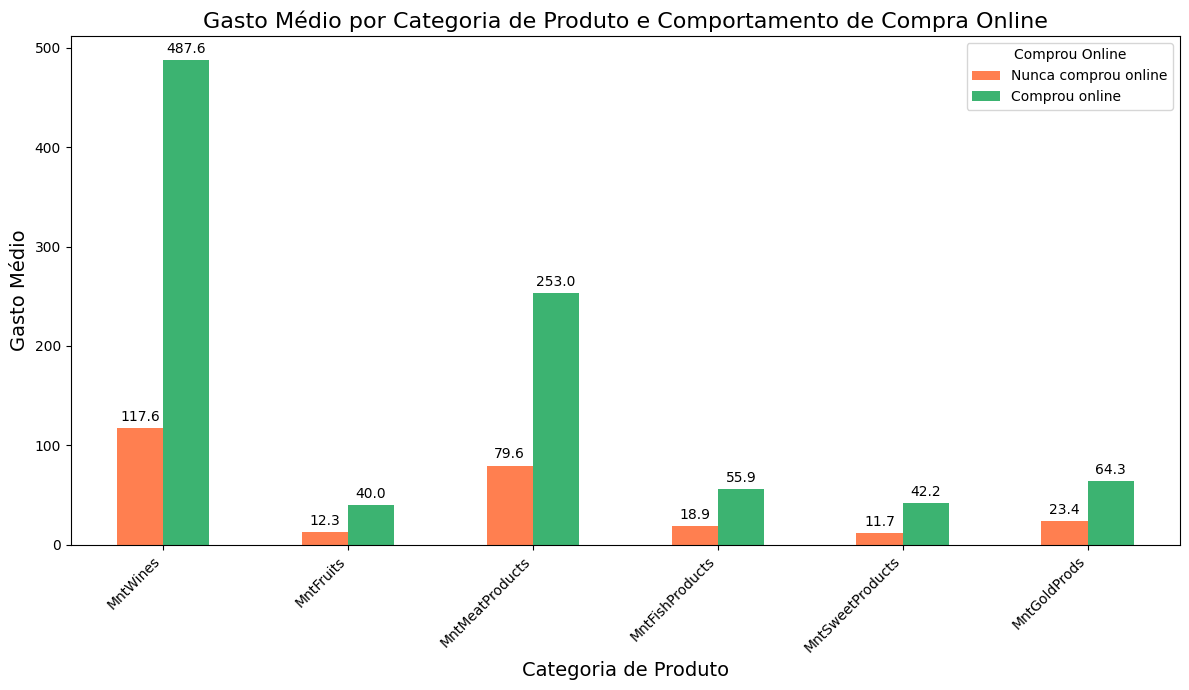

In [46]:
# Selecionando as colunas de gastos por categoria
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Agrupando por WebPurchases e calculando a média dos gastos por categoria
avg_spending_by_purchase = base.groupby('WebPurchases')[spending_cols].mean().T

# Renomeando as colunas para melhor legibilidade
avg_spending_by_purchase.rename(columns={0: 'Nunca comprou online', 1: 'Comprou online'}, inplace=True)

# Plotando o gráfico de barras comparando os gastos médios
ax = avg_spending_by_purchase.plot(kind='bar', figsize=(12, 7), color=['coral', 'mediumseagreen'])

# Adicionando rótulos com os valores médios nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Títulos e rótulos
plt.title('Gasto Médio por Categoria de Produto e Comportamento de Compra Online', fontsize=16)
plt.xlabel('Categoria de Produto', fontsize=14)
plt.ylabel('Gasto Médio', fontsize=14)
plt.xticks(rotation=45, ha='right') # Girando os rótulos do eixo X para melhor visualização
plt.legend(title='Comprou Online')
plt.tight_layout()
plt.show()

### Insights Finais:

**Faixa Etária**: Maior concentração entre 40 e 59 anos, fase de alta estabilidade financeira e maturidade de consumo, com espaço para maior exploração. Entre 60 e 79 anos está a maior proporção de compradores, indicando alto potencial para ações específicas a esse público.

**Distribuição de Renda:** A renda dos visitantes que compraram tende a se concentrar em valores mais altos, enquanto os que não compraram apresentam maior presença nas faixas mais baixas.

**Escolaridade:** Conforme aumenta o nível de escolaridade, cresce também a propensão a comprar online. Esse padrão se explica, em grande parte, por fatores ligados à maturidade e ao momento de vida, como maior exposição à tecnologia, confiança em transações digitais e poder aquisitivo mais elevado.

**Compras por Visitas:** Clientes com menor frequência de visitas ao site (0-5 vezes/mês) tendem a ter maior proporção de compras online. Surpreendentemente, visitas muito altas (12+/mês) não resultaram em compras.

**Gasto por Categoria:** Clientes que compram online tendem a gastar significativamente mais em todas as categorias de produtos, especialmente em Vinhos e Produtos de Carne, comparado aos que não compraram online.




# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








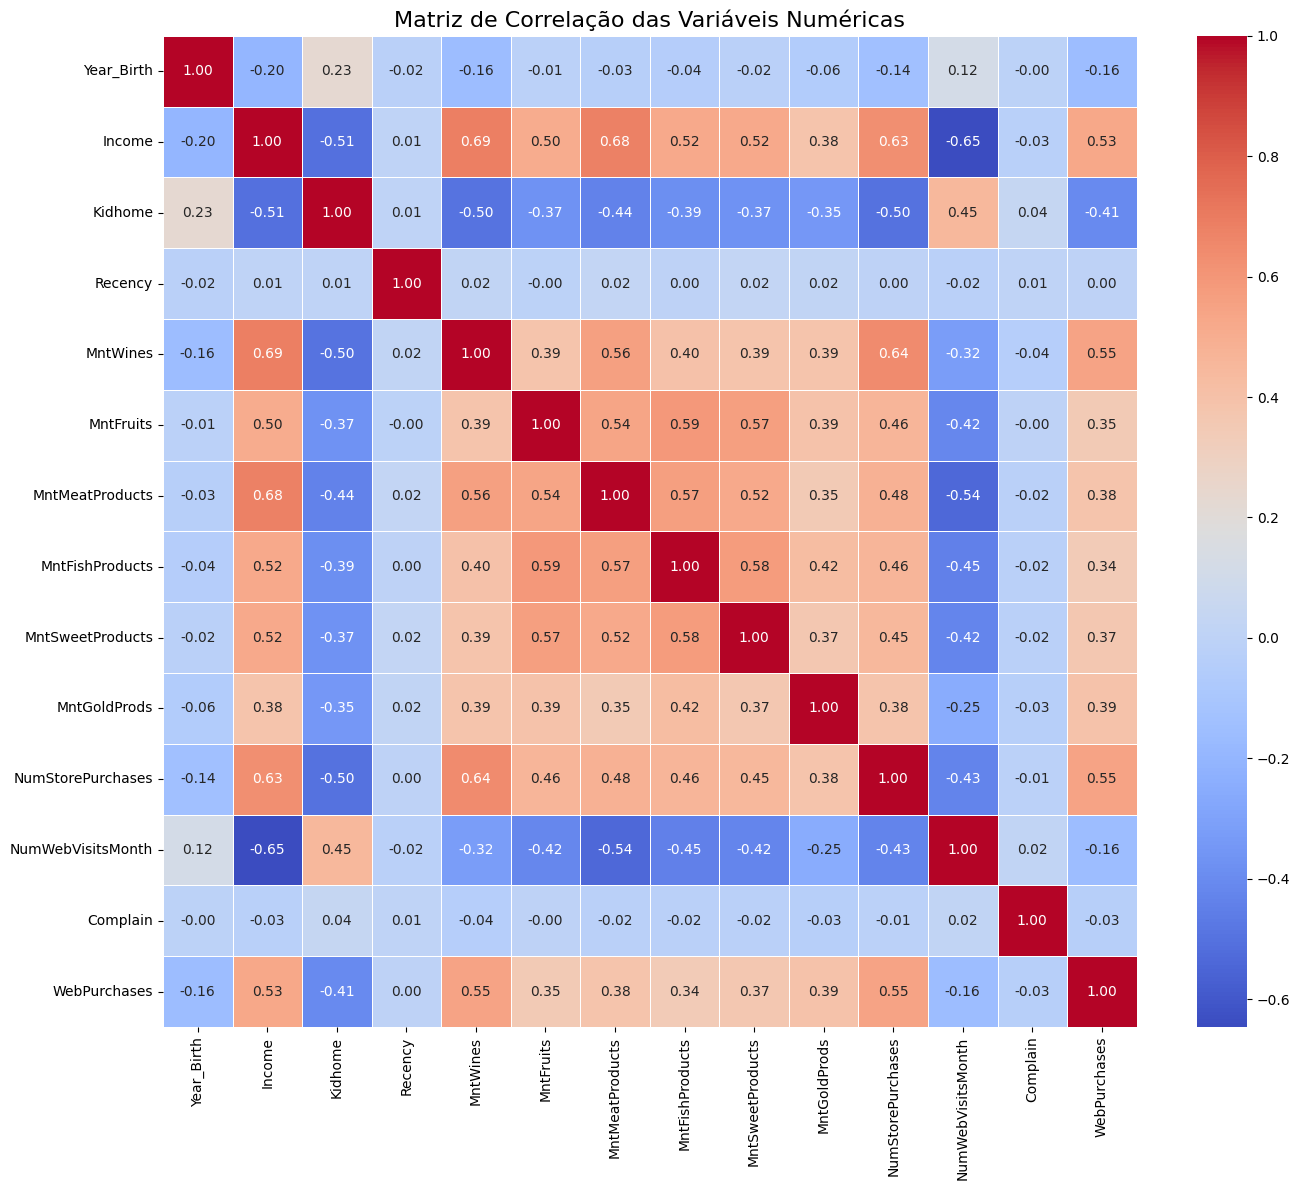

In [47]:
# As colunas a serem excluídas são as que foram criadas para visualização de gráficos
cols_to_exclude_from_corr = ['Faixa_Etaria', 'Comprou_Web', 'Faixa_Visitas_Web']
original_numeric_cols = base.select_dtypes(include=np.number).columns.tolist()
original_numeric_cols = [col for col in original_numeric_cols if col not in cols_to_exclude_from_corr]

correlation_matrix = base[original_numeric_cols].corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

Explicação:

Apesar da baixa correlação entre as variáveis Recency e Complain com a variável alvo e com outras variáveis numéricas, optei por manter essas colunas nesta fase. A decisão se baseia na possibilidade de existirem relações futuras que não são capturadas pela matriz. Deixando a necessidade a merce dos modelos, de decidirem se são importantes ou não.

In [48]:
# One-Hot Encoding para 'Marital_Status' e 'Education'
categorical_cols_to_encode = ['Marital_Status', 'Education']
base = pd.get_dummies(base, columns=categorical_cols_to_encode, drop_first=True)

# Visualizar o data frame
base.head()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,1957,58138.0,0,58,635,88,546,172,88,88,...,False,False,True,False,False,False,False,True,False,False
1,1954,46344.0,1,38,11,1,6,2,1,6,...,False,False,True,False,False,False,False,True,False,False
2,1965,71613.0,0,26,426,49,127,111,21,42,...,False,False,False,True,False,False,False,True,False,False
3,1984,26646.0,1,26,11,4,20,10,3,5,...,False,False,False,True,False,False,False,True,False,False
4,1981,58293.0,1,94,173,43,118,46,27,15,...,False,True,False,False,False,False,False,False,False,True


In [49]:
# Removendo as colunas criadas apenas para visualização e que viraram codificadas
base = base.drop(['Faixa_Etaria', 'Comprou_Web', 'Faixa_Visitas_Web'], axis=1)

In [50]:
# Separando a variável alvo (y) das variáveis preditoras (X)
X = base.drop('WebPurchases', axis=1) # X são todas as colunas, exceto WebPurchases
y = base['WebPurchases'] # y é a coluna WebPurchases

# Separando os dados em conjuntos de treino e teste
# test_size=0.20 significa que 20% dos dados serão usados para teste
# random_state=42 garante que a separação seja a mesma toda vez que rodarmos o código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Verificando o tamanho dos conjuntos
print("Tamanho do conjunto de treino (X_train):", X_train.shape)
print("Tamanho do conjunto de teste (X_test):", X_test.shape)
print("Tamanho do conjunto de treino (y_train):", y_train.shape)
print("Tamanho do conjunto de teste (y_test):", y_test.shape)

Tamanho do conjunto de treino (X_train): (1788, 24)
Tamanho do conjunto de teste (X_test): (448, 24)
Tamanho do conjunto de treino (y_train): (1788,)
Tamanho do conjunto de teste (y_test): (448,)


In [51]:
# Identificar as colunas numéricas para padronização
numerical_cols_to_scale = X_train.select_dtypes(include=np.number).columns.tolist()

# Removendo colunas com one-hot encoded que começam com 'Marital_' ou 'Education_'
one_hot_cols = [col for col in numerical_cols_to_scale if col.startswith(('Marital_', 'Education_'))]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in one_hot_cols]

# Iniciando a padronização
scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# Visualizar as primeiras linhas dos dados de treino padronizados para verificar
print("Primeiras linhas do X_train padronizado:")
display(X_train.head(3))
print("\nPrimeiras linhas do X_test padronizado:")
display(X_test.head(3))

Primeiras linhas do X_train padronizado:


,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Basic,Education_Graduation,Education_Master,Education_PhD
778,-1.174671,-0.036839,1.033997,1.036838,-0.833413,-0.641406,-0.690205,-0.688442,-0.636661,-0.769071,...,False,False,True,False,False,False,False,False,True,False
260,0.877751,-1.704593,1.033997,0.380908,-0.908244,-0.616128,-0.703492,-0.615473,-0.588975,-0.599874,...,True,False,False,False,False,False,False,True,False,False
1496,0.706716,-0.882513,1.033997,-0.447636,-0.797494,-0.666684,-0.685776,-0.633716,-0.636661,-0.825470,...,True,False,False,False,False,False,False,True,False,False



Primeiras linhas do X_test padronizado:


,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Basic,Education_Graduation,Education_Master,Education_PhD
430,-0.661566,1.533373,-0.831580,-1.655929,2.824340,-0.262237,0.806833,0.095976,-0.279012,-0.543475,...,False,False,True,False,False,False,False,False,False,True
742,-1.602259,-0.146527,1.033997,1.036838,-0.827426,-0.641406,-0.645914,-0.633716,-0.660505,-0.656273,...,False,False,True,False,False,False,False,False,False,True
550,-0.490530,-0.575554,1.033997,1.313020,-0.866339,-0.565573,-0.694634,-0.633716,-0.565132,-0.505876,...,False,False,True,False,False,False,False,False,False,False


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [52]:
# Primeiro modelo será progressão logística
modelo1 = LogisticRegression(random_state=42)

# Treinar o modelo com os dados de treino padronizados
modelo1.fit(X_train, y_train)
y_pred_1 = modelo1.predict(X_test)

print("\nPrevisões do modelo de Regressão Logística:")
print(y_pred_1[:10]) # Mostrar as primeiras 10 previsões


Previsões do modelo de Regressão Logística:
[1 0 0 0 0 1 1 0 1 0]


In [53]:
# Definindo parametros de teste
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]}

# Randomizando a busca
rf_base = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy')

# Ajustando e seleção dos melhores
print("Iniciando busca pelos melhores hiperparâmetros para Random Forest...")
random_search.fit(X_train, y_train)
print("Busca por hiperparâmetros concluída.")

best_params = random_search.best_params_

print("\nMelhores hiperparâmetros encontrados:", best_params)

# Segundo modelo será a árvore de classificação - Inicializado com os melhores hiperparâmetros
modelo2 = RandomForestClassifier(**best_params, random_state=42)

# Treinar o modelo com os dados de treino padronizados
print("\nTreinando o modelo Random Forest com melhores hiperparâmetros...")
modelo2.fit(X_train, y_train)
print("Treinamento do Random Forest concluído.")

# Fazer previsões no conjunto de teste
y_pred_2 = modelo2.predict(X_test)

print("\nPrevisões do modelo Random Forest no conjunto de teste (com melhores hiperparâmetros):")
print(y_pred_2[:10]) # Mostrar as primeiras 10 previsões

Iniciando busca pelos melhores hiperparâmetros para Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Busca por hiperparâmetros concluída.

Melhores hiperparâmetros encontrados: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}

Treinando o modelo Random Forest com melhores hiperparâmetros...
Treinamento do Random Forest concluído.

Previsões do modelo Random Forest no conjunto de teste (com melhores hiperparâmetros):
[1 0 0 0 0 1 1 0 1 0]


# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.


Acurácia: 0.8527

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       222
           1       0.87      0.84      0.85       226

    accuracy                           0.85       448
   macro avg       0.85      0.85      0.85       448
weighted avg       0.85      0.85      0.85       448


Matriz de Confusão:


array([[193,  29],
       [ 37, 189]])

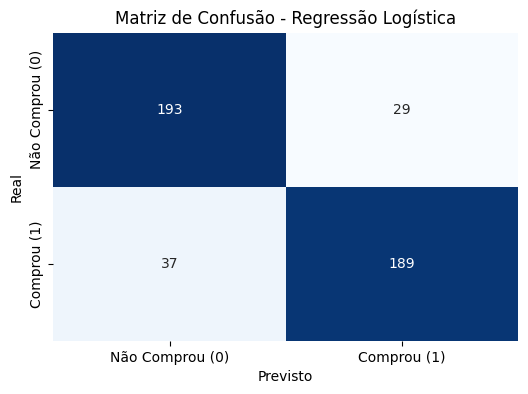

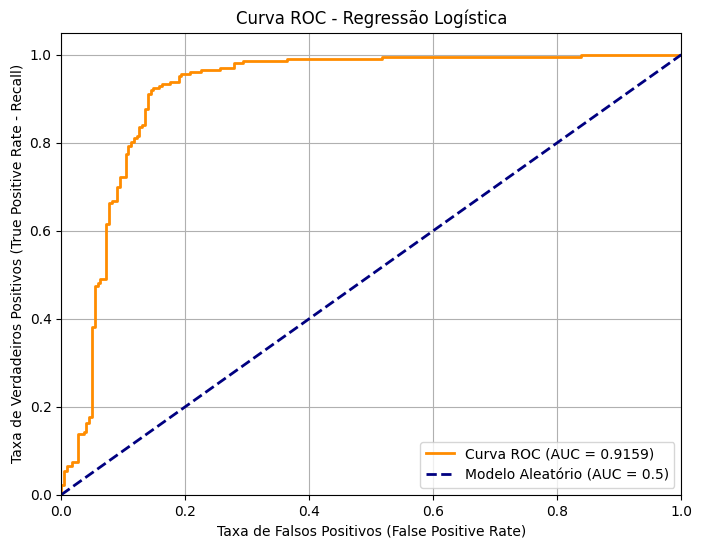


AUC para Regressão Logística: 0.9159


In [54]:
# Avaliando o Modelo de Regressão Logística

# Acurácia
accuracy_log_reg = accuracy_score(y_test, y_pred_1)
print(f"\nAcurácia: {accuracy_log_reg:.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_1))

# Matriz de Confusão
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_1)
print("\nMatriz de Confusão:")
display(conf_matrix_log_reg)

# Visualização da Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Comprou (0)', 'Comprou (1)'],
            yticklabels=['Não Comprou (0)', 'Comprou (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

# Cálculo e Plotagem da Curva ROC e AUC
y_pred_proba_log_reg = modelo1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)

# Calcular a área sob a curva ROC (AUC)
auc_log_reg = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_log_reg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatório (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate - Recall)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nAUC para Regressão Logística: {auc_log_reg:.4f}")


Acurácia: 0.9241

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       222
           1       0.92      0.93      0.93       226

    accuracy                           0.92       448
   macro avg       0.92      0.92      0.92       448
weighted avg       0.92      0.92      0.92       448


Matriz de Confusão:


array([[203,  19],
       [ 15, 211]])

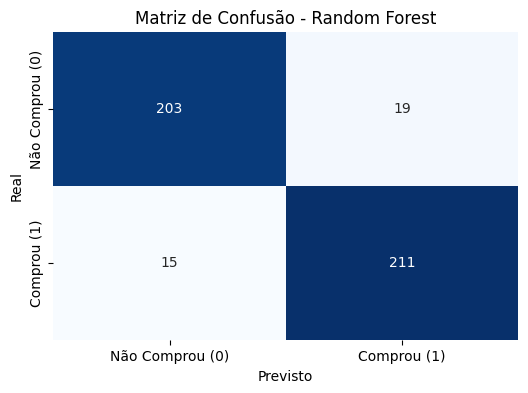


Avaliação da Curva ROC e AUC:


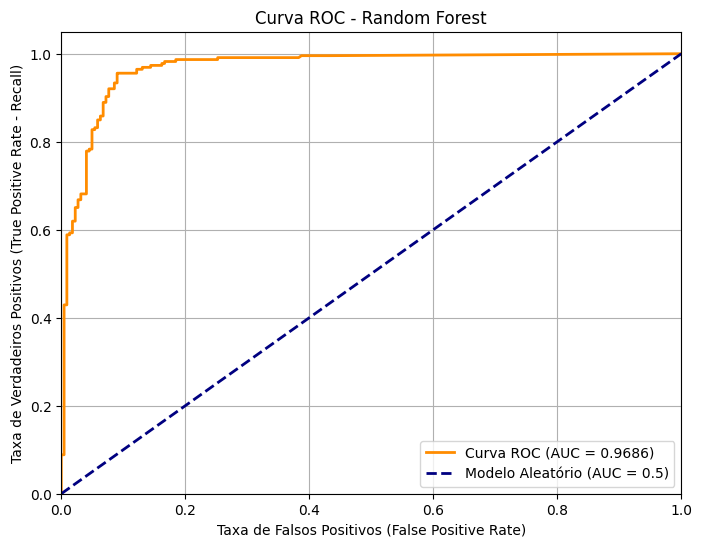


AUC para Random Forest: 0.9686


In [55]:
# Avaliando o Modelo de Random Forest

# Acurácia
accuracy_rf = accuracy_score(y_test, y_pred_2)
print(f"\nAcurácia: {accuracy_rf:.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_2))

# Matriz de Confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred_2)
print("\nMatriz de Confusão:")
display(conf_matrix_rf)

# Visualização da Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Comprou (0)', 'Comprou (1)'],
            yticklabels=['Não Comprou (0)', 'Comprou (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# Cálculo e Plotagem da Curva ROC e AUC
print("\nAvaliação da Curva ROC e AUC:")
y_pred_proba_rf = modelo2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
auc_rf = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatório (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate - Recall)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nAUC para Random Forest: {auc_rf:.4f}")

# Avaliação final

O segundo modelo testado, o Random Forest teve um desempenho melhor que o primeiro modelo, a Regressão Logística. No qual apresentou uma acurácia maior (+7,1 p.p.) e um AUC maior (+0.053), indicando que a Random Forest foi mais eficaz em prever corretamente a intenção de compra online e em distinguir entre os clientes que compram e os que não compram. A matriz de confusão da Random Forest também exibiu uma menor quantidade de falhas.